In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
web_graph = np.array([
    [0, 1, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
], dtype = float)

# Damping factor
d = 0.85
# Initializa PageRank values
num_pages = len(web_graph)

page_rank = np.ones(num_pages)/num_pages
# print(page_rank)
# print(np.sum(page_rank))
# Iterative PageRank calculation
max_iteration = 30
convergence_iter = 1

mean_err = list()

# Margin of Error
err_tol = 0.001


In [3]:
# for iteration in range(max_iteration):
while convergence_iter < max_iteration:
    new_page_rank = np.zeros(num_pages)
    for i in range(num_pages):
        for j in range(num_pages):
            if web_graph[j, i] == 1:
                new_page_rank[i] += d * page_rank[j] / np.sum(web_graph[j])
        new_page_rank[i] += (1-d)/num_pages
    # Calculate the error 
    error = np.abs((new_page_rank - page_rank)/page_rank)
    mean_err.append(np.mean(error))

    if np.mean(error) < err_tol:
    # if np.all(error < err_tol):
        break
    convergence_iter += 1
    page_rank = new_page_rank


In [4]:
# Normalize PageRank values
page_rank /= np.sum(page_rank)
print(page_rank)
print(convergence_iter)

[0.06486547 0.05756825 0.08203507 0.39444639 0.40108482]
21


Text(0, 0.5, 'Error')

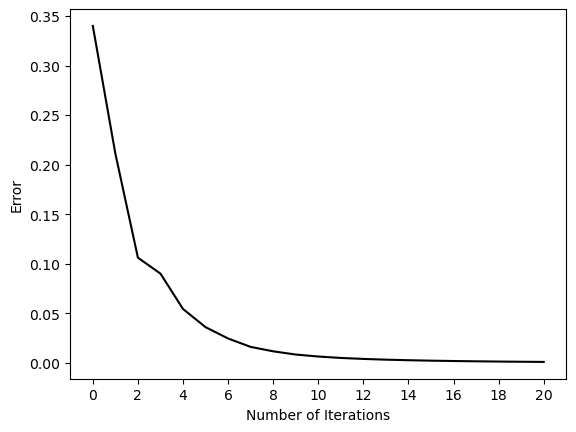

In [5]:
plt.plot(mean_err, color = 'black')
plt.xticks(range(0, len(mean_err), 2))
plt.xlabel('Number of Iterations') 
plt.ylabel('Error')